# Goalie data viz

In [10]:
import pandas as pd
import numpy as np
import seaborn as ans
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import math
from PIL import Image

color_map = plt.cm.winter

In [26]:
#df = pd.read_excel('cleaned_NHL_fenwick_even_strength_2021.xlsx')
df = pd.read_excel('cleaned_NHL_fenwick_2021.xlsx')
df.head()

,Unnamed: 0,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,...,prev_ev_shot,Home,Score,Shot_Distance,Shot_Off_Rebound,Shot_Off_Last_Shot,Dangerous_Shot_Off_Rebound,Dangerous_Shot_Off_Shot,Goalie_rebound_given,Goalie__dangerous_rebound_given
0,2,20001,2021-01-13,1,SHOT,"PHI ONGOAL - #11 KONECNY, Wrist, Off. Zone, 32...",0:16,16,5x5,Off,...,0,1,Tied,32,0,0,0,0,0.0,0.0
1,5,20001,2021-01-13,1,SHOT,"PIT ONGOAL - #9 RODRIGUES, Wrist, Off. Zone, 4...",0:34,34,5x5,Off,...,1,0,Tied,47,0,0,0,0,0.0,0.0
2,8,20001,2021-01-13,1,SHOT,"PHI ONGOAL - #86 FARABEE, Backhand, Off. Zone,...",1:05,65,5x5,Off,...,0,1,Tied,48,0,0,0,0,0.0,0.0
3,20,20001,2021-01-13,1,SHOT,"PIT ONGOAL - #9 RODRIGUES, Snap, Off. Zone, 60...",2:51,171,5x5,Off,...,0,0,Tied,60,0,0,0,0,0.0,0.0
4,23,20001,2021-01-13,1,MISS,"PHI #5 MYERS, Slap, Wide of Net, Off. Zone, 54...",3:29,209,5x5,Off,...,0,1,Tied,54,0,0,0,0,0.0,0.0


In [27]:
df.columns

Index(['Unnamed: 0', 'Game_Id', 'Date', 'Period', 'Event', 'Description',
       'Time_Elapsed', 'Seconds_Elapsed', 'Strength', 'Ev_Zone', 'Type',
       'Ev_Team', 'Home_Zone', 'Away_Team', 'Home_Team', 'p1_name', 'p1_ID',
       'p2_name', 'p2_ID', 'p3_name', 'p3_ID', 'Away_Score', 'Home_Score',
       'Away_Goalie', 'Away_Goalie_Id', 'Home_Goalie', 'Home_Goalie_Id', 'xC',
       'yC', 'Goal', 'Shootout_shot', 'Power_play_shot', 'Goalie_shot_on',
       'xC_Previous_Row', 'yC_Previous_Row', 'x', 'y', 'x_prev', 'y_prev',
       'x_dist', 'x_dist_prev', 'shot_angle', 'dist_from_prev_ev',
       'Ev_Team_Previous_Row', 'Game_Id_Previous_Row', 'Event_Previous_Row',
       'Event_Next_Row', 'Previous_Ev_Seconds', 'Seconds_From_Last_Shot',
       'Rebound_Seconds', 'Freeze', 'prev_ev_shot', 'Home', 'Score',
       'Shot_Distance', 'Shot_Off_Rebound', 'Shot_Off_Last_Shot',
       'Dangerous_Shot_Off_Rebound', 'Dangerous_Shot_Off_Shot',
       'Goalie_rebound_given', 'Goalie__dangerous_rebou

In [28]:
df['Goalie_shot_on'].value_counts()

CONNOR HELLEBUYCK     1856
JORDAN BINNINGTON     1667
ANDREI VASILEVSKIY    1646
KEVIN LANKINEN        1568
THATCHER DEMKO        1554
                      ... 
MAXIME LAGACE           36
ARTYOM ZAGIDULIN        19
KASIMIR KASKISUO         6
VEINI VEHVILAINEN        5
LOGAN THOMPSON           3
Name: Goalie_shot_on, Length: 97, dtype: int64

In [44]:
#create dataframe for igor shesterkin
df_is = df[df['Goalie_shot_on'] == "IGOR SHESTERKIN"]
df_is = df[df['Goalie_shot_on'] == "IGOR SHESTERKIN"]
df_jg = df[df['Goalie_shot_on'] == "JOHN GIBSON"]
df_ch = df[df['Goalie_shot_on'] == "CONNOR HELLEBUYCK"]
df_cp = df[df['Goalie_shot_on'] == "CALVIN PETERSEN"]
df_mm = df[df['Goalie_shot_on'] == "MATT MURRAY"]
df_crh = df[df['Goalie_shot_on'] == "CARTER HART"]
df_mj = df[df['Goalie_shot_on'] == "MARTIN JONES"]
df_js = df[df['Goalie_shot_on'] == "JUUSE SAROS"]
df_is.head(40)

,Unnamed: 0,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,...,prev_ev_shot,Home,Score,Shot_Distance,Shot_Off_Rebound,Shot_Off_Last_Shot,Dangerous_Shot_Off_Rebound,Dangerous_Shot_Off_Shot,Goalie_rebound_given,Goalie__dangerous_rebound_given
560,2006,20008,2021-01-14,1,SHOT,"NYR ONGOAL - #93 ZIBANEJAD, Wrist, Neu. Zone, ...",0:21,21,5x5,Neu,...,0,1,Tied,96,0,0,0,0,0.0,0.0
562,2013,20008,2021-01-14,1,SHOT,"NYI ONGOAL - #13 BARZAL, Tip-In, Off. Zone, 26...",1:48,108,5x5,Off,...,0,0,Tied,26,0,0,0,0,0.0,0.0
563,2016,20008,2021-01-14,1,SHOT,"NYI ONGOAL - #12 BAILEY, Wrist, Off. Zone, 38 ft.",1:58,118,4x5,Off,...,0,0,Tied,38,0,0,0,0,0.0,0.0
564,2019,20008,2021-01-14,1,GOAL,"NYI #29 NELSON(1), Wrist, Off. Zone, 10 ft.Ass...",2:33,153,4x5,Off,...,1,0,Tied,10,0,1,0,0,0.0,0.0
565,2025,20008,2021-01-14,1,MISS,"NYI #27 LEE, Tip-In, Wide of Net, Off. Zone, 1...",3:21,201,5x5,Off,...,0,0,Home Team Losing,15,0,0,0,0,0.0,0.0
566,2027,20008,2021-01-14,1,SHOT,"NYI ONGOAL - #27 LEE, Snap, Off. Zone, 10 ft.",3:37,217,5x5,Off,...,0,0,Home Team Losing,10,0,0,0,0,1.0,0.0
567,2028,20008,2021-01-14,1,GOAL,"NYI #27 LEE(1), Snap, Off. Zone, 27 ft.Assist:...",3:52,232,5x5,Off,...,1,0,Home Team Losing,27,1,1,0,0,0.0,0.0
570,2044,20008,2021-01-14,1,SHOT,"NYI ONGOAL - #6 PULOCK, Slap, Off. Zone, 47 ft.",6:31,391,5x5,Off,...,0,0,Home Team Losing,47,0,0,0,0,0.0,0.0
573,2064,20008,2021-01-14,1,MISS,"NYI #7 EBERLE, Wrist, Wide of Net, Off. Zone, ...",11:28,688,4x5,Off,...,0,0,Home Team Losing,29,0,0,0,0,0.0,0.0
574,2066,20008,2021-01-14,1,MISS,"NYI #18 BEAUVILLIER, Slap, Wide of Net, Off. Z...",12:22,742,4x5,Off,...,0,0,Home Team Losing,39,0,0,0,0,0.0,0.0


# Import Rink Image

<ipython-input-30-68497b43302a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = [''], fontsize = 18,
<ipython-input-30-68497b43302a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = [''], fontsize = 18,


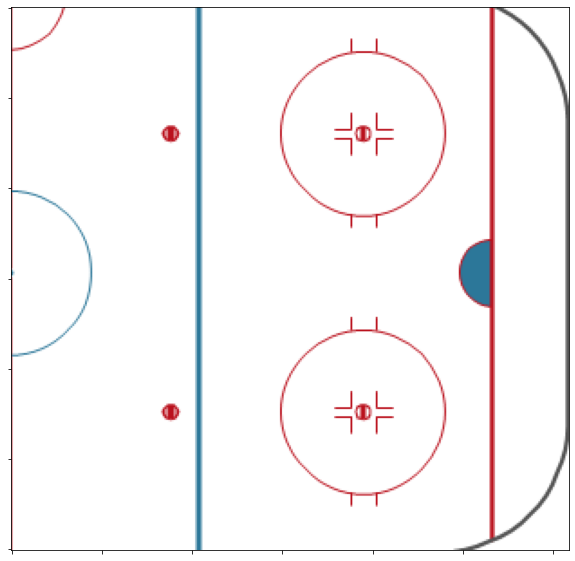

In [30]:
# Using matplotlib we create a new figure for plotting
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Clean up the figure to be completely blank
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
fig.patch.set_alpha(0.0)

# Remove the labelling of axes
ax.set_xticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)
ax.set_yticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)

# Using pillow to get the rink image and extract the image size
I = Image.open("C:/Users/BRG4142/Pictures/hockey_rink3.PNG")
I  = I.rotate(180) #rotate 180 degrees so it matches the direction of the x, y coordinates
ax.imshow(I);width, height = I.size

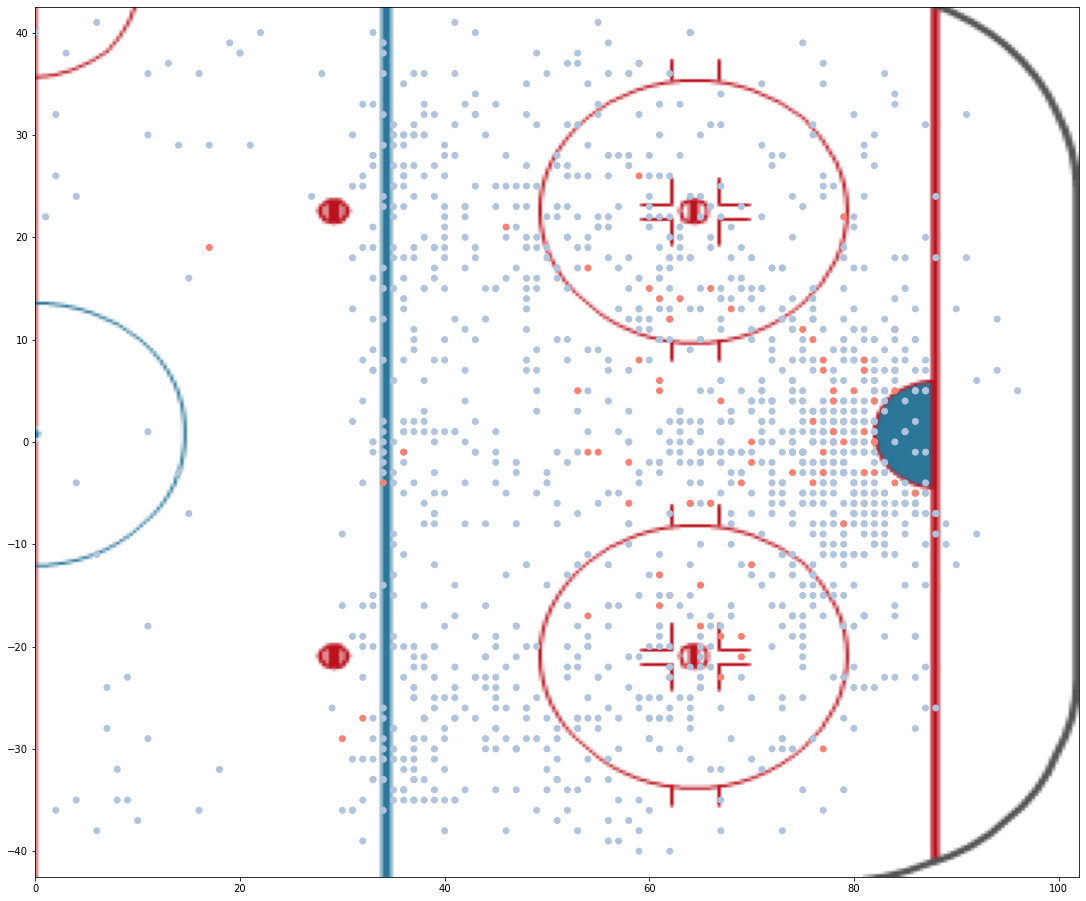

In [31]:
#Igor Shesterkin

#set golor for goals
col = np.where(df_is['Goal'] == 1,'salmon',np.where(df_is['Goal'] == 0,'lightsteelblue','b'))

fig, ax = plt.subplots(figsize = (20,16))
ax.imshow(I, extent=[0,102,-42.5,42.5])
ax.scatter(df_is['x'], df_is['y'], c=col)
plt.xlim([0, 102])
plt.ylim([-42.5, 42.5])
plt.show()

In [32]:
df_is.Goal.value_counts(normalize=True)

0    0.934703
1    0.065297
Name: Goal, dtype: float64

In [33]:
df_is.Goal.value_counts()

0    1274
1      89
Name: Goal, dtype: int64

In [35]:
df_is[['Goal','Type','Event']].head()

,Goal,Type,Event
560,0,WRIST SHOT,SHOT
562,0,TIP-IN,SHOT
563,0,WRIST SHOT,SHOT
564,1,WRIST SHOT,GOAL
565,0,TIP-IN,MISS


In [37]:
df_is.Type.value_counts()

WRIST SHOT     742
SLAP SHOT      207
SNAP SHOT      165
TIP-IN         121
BACKHAND        96
DEFLECTED       25
WRAP-AROUND      7
Name: Type, dtype: int64

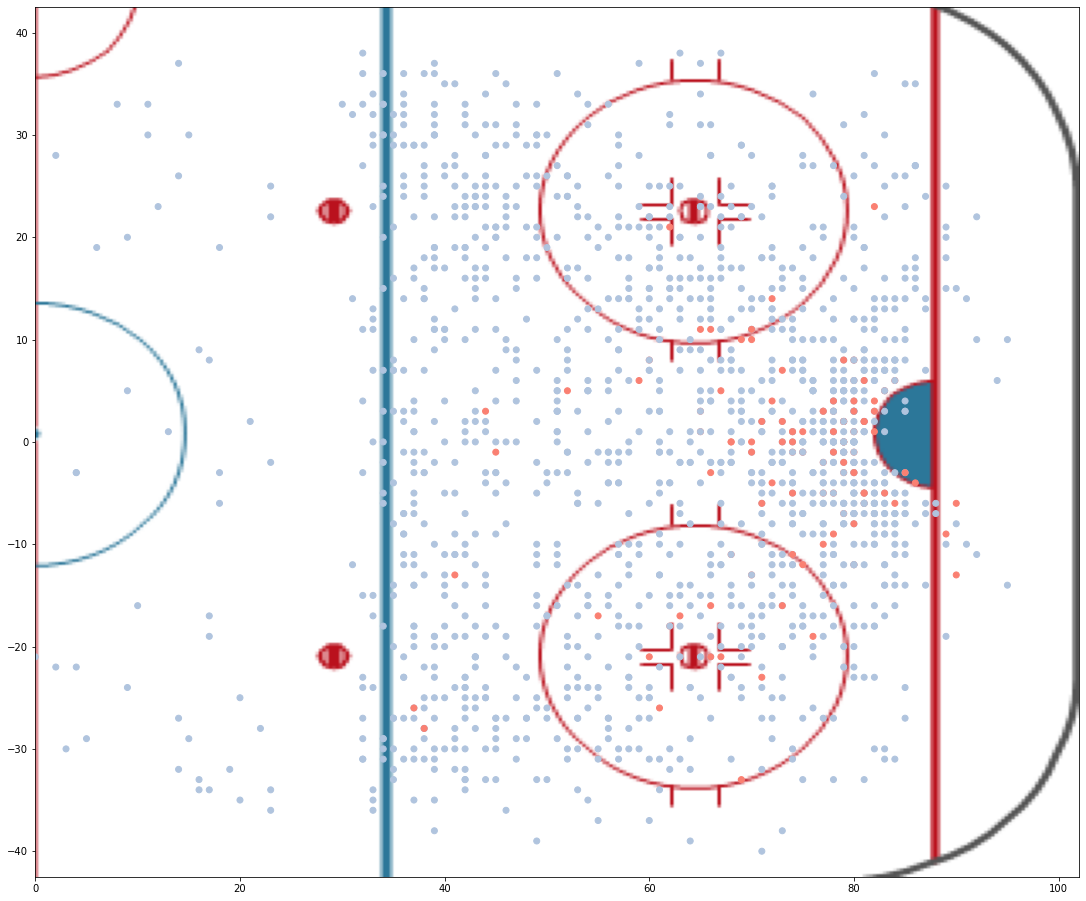

In [41]:
#John Gibson

#set golor for goals
col = np.where(df_jg['Goal'] == 1,'salmon',np.where(df_jg['Goal'] == 0,'lightsteelblue','b'))

fig, ax = plt.subplots(figsize = (20,16))
ax.imshow(I, extent=[0,102,-42.5,42.5])
ax.scatter(df_jg['x'], df_jg['y'], c=col)
plt.xlim([0, 102])
plt.ylim([-42.5, 42.5])
plt.show()

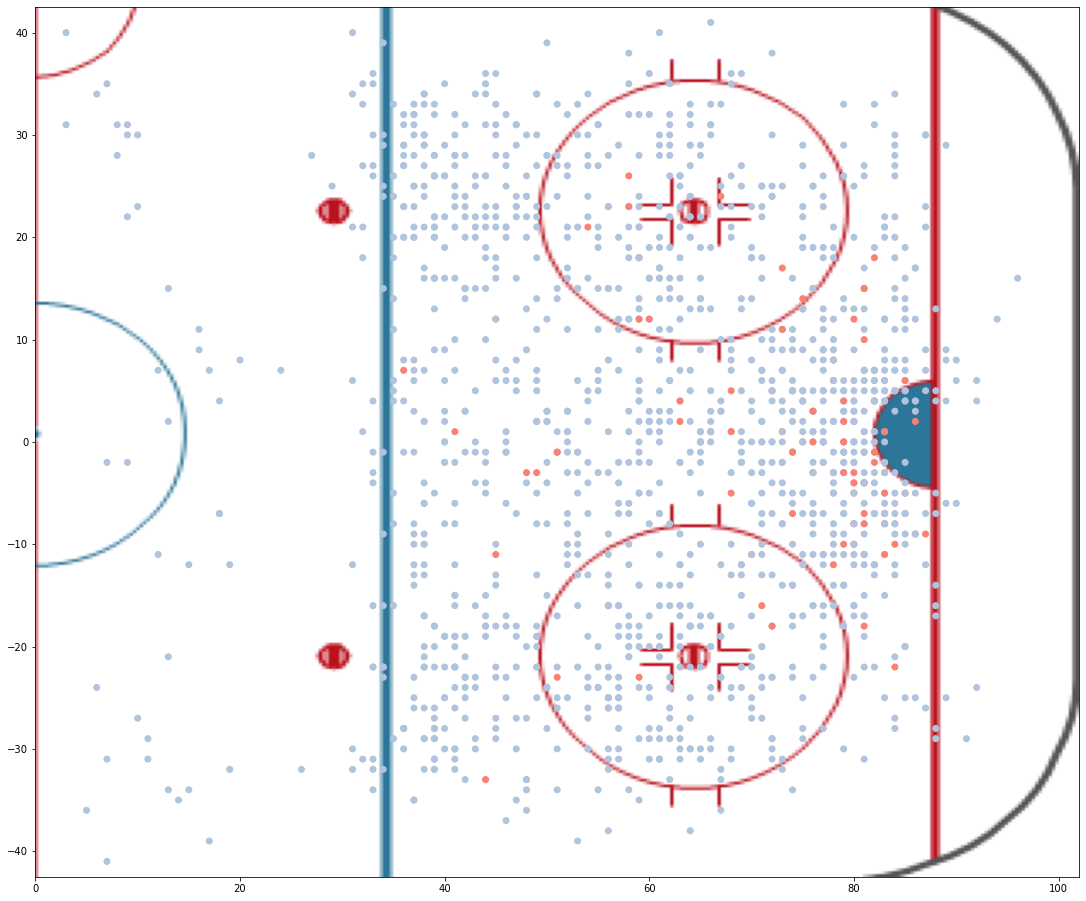

In [45]:
#Jusse Saros
#set golor for goals
col = np.where(df_js['Goal'] == 1,'salmon',np.where(df_js['Goal'] == 0,'lightsteelblue','b'))

fig, ax = plt.subplots(figsize = (20,16))
ax.imshow(I, extent=[0,102,-42.5,42.5])
ax.scatter(df_js['x'], df_js['y'], c=col)
plt.xlim([0, 102])
plt.ylim([-42.5, 42.5])
plt.show()

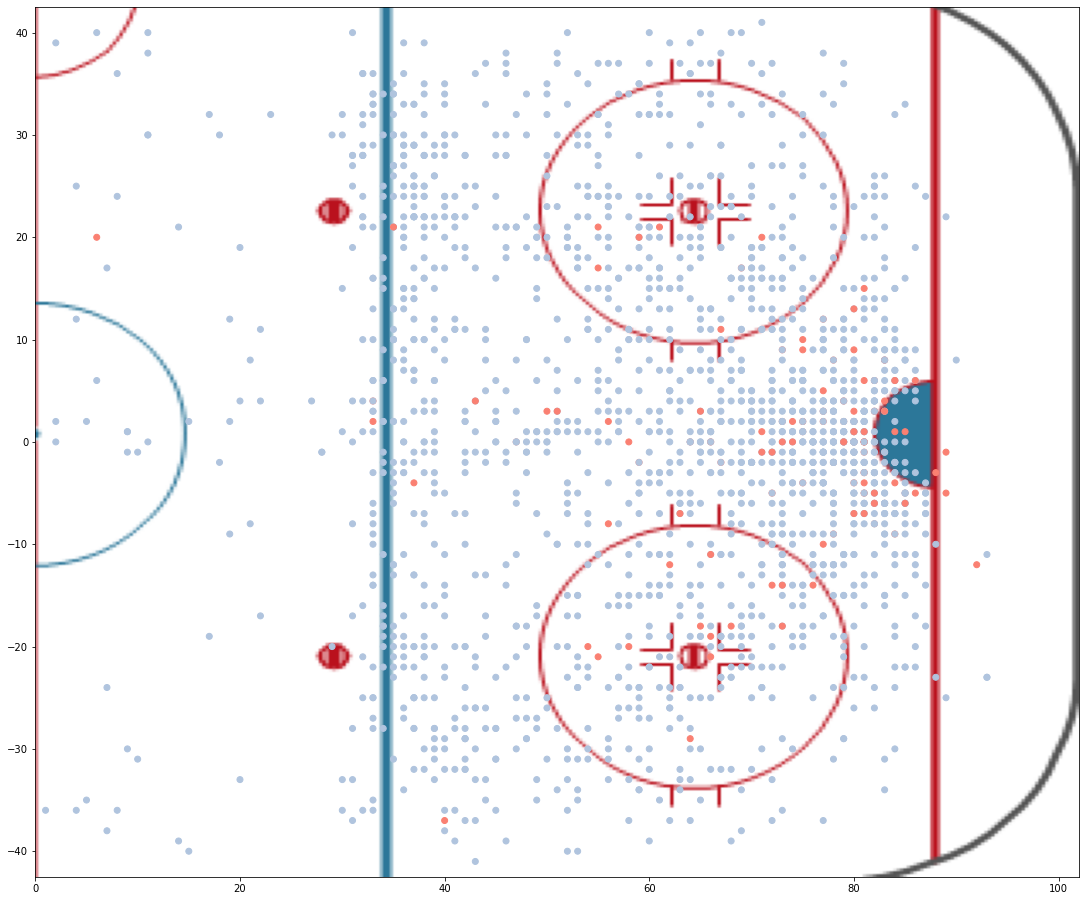

In [43]:
#Connor Hellebuyck
#set golor for goals
col = np.where(df_ch['Goal'] == 1,'salmon',np.where(df_ch['Goal'] == 0,'lightsteelblue','b'))

fig, ax = plt.subplots(figsize = (20,16))
ax.imshow(I, extent=[0,102,-42.5,42.5])
ax.scatter(df_ch['x'], df_ch['y'], c=col)
plt.xlim([0, 102])
plt.ylim([-42.5, 42.5])
plt.show()

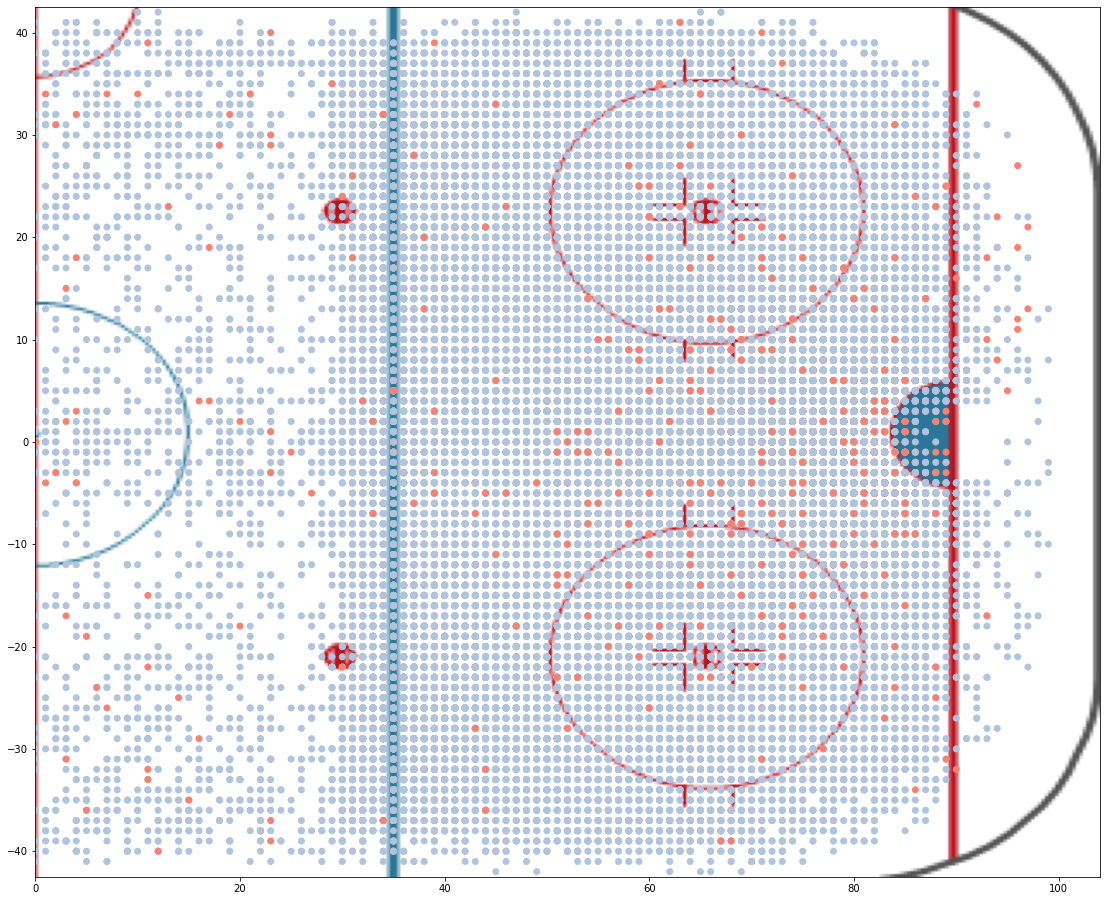

In [21]:
#all shots

#set golor for goals
col = np.where(df['Goal'] == 1,'salmon',np.where(df['Goal'] == 0,'lightsteelblue','b'))

fig, ax = plt.subplots(figsize = (20,16))
ax.imshow(I, extent=[0,104,-42.5,42.5])
ax.scatter(df['x'], df['y'], c=col)
plt.xlim([0, 104])
plt.ylim([-42.5, 42.5])
plt.show()

In [39]:
df.Goal.value_counts(normalize=True)

0    0.927983
1    0.072017
Name: Goal, dtype: float64